# QR factorization applied to a problem, using Python

<p style="text-align:justify">Through this text, I pretend to describe the process I did to fit some data, which was produced and translated into a quadratic function related to the variation of $c/a$ under pressure; where $c$ and $a$ are structural parameters of $\text{MoB}_2$. This quadratic function is given by</p>

$$
\frac{c}{a}\left( V \right) = \frac{c_0}{a_0}+\alpha\left(1-\frac{V}{V_0}\right)+\beta\left(1-\frac{V}{V_0}\right)^2
$$

or

$$
\Rightarrow \frac{c}{a}\left( V \right)-\frac{c_0}{a_0} = \alpha\left(1-\frac{V}{V_0}\right)+\beta\left(1-\frac{V}{V_0}\right)^2
$$

<p style="text-align:justify">This last change is only for convenience.</p>

<p style="text-align:justify">So, the question here is to find the minimum value for $\alpha$ and $\beta$. The process will be based on the QR decomposition method, due to the data which will be involved.</p>

<p style="text-align:justify">This data is contained in a text file called <a href="https://drive.google.com/file/d/16KFSf4Tgmv3JEp7fX0OkVdTtp2YRPeuV/view?usp=sharing">*v_vs_c_a_vs_energy.txt*</a>, which shows three columns where the first one enumerates the volumes; the second one, its respective $c/a$ value, and the last column shows the energy generated by.</p>

<p style="text-align:justify">Once explained this before, let’s start with the most exciting part (according to me). The process consists of solving the next system</p>

$$
A\vec{x}=\vec{b}\quad ;\quad \vec{x} = (\alpha, \beta)^{T}
$$

<p style="text-align:justify">And $A$, in first instance, is a $12x2$ matrix with coefficients given by evaluating $\left(1-\frac{V}{V_0}\right)$ and $\left(1-\frac{V}{V_0}\right)^2$. The key is to factorize $A$ into two matrices $Q$, $R$; where $Q$ will be a 12x2 matrix with orthonormal columns and $R$ will be an upper triangular matrix.</p>

<p style="text-align:justify">Once done this before, the process will consist of remembering what the least-squares by QR method incorporates. Basically, the problem before now is resumed on solving the next system:</p>

$$
R\vec{x} = Q^{T}\vec{b}\quad\Rightarrow \quad\vec{x} = R^{-1}Q^{T}\vec{b}
$$

<p style="text-align:justify">To finally obtain the $\alpha$ and $\beta$ values.</p>

<p style="text-align:justify">Easy, isn’t it? The process before may sound easy when we work with a few data, but this is not the case, so imagine working with $12x2$ matrices; it’s still okay, but it may take a long time to finish.</p>

## Accelerating the process with Python

<p style="text-align:justify">It’s here where Python appears; this amazing programming language will help to accelerate the task.</p>

<p style="text-align:justify">We only will be using the NumPy library, so let’s import it into our environment.</p>

In [1]:
import numpy as np

<p style="text-align:justify">Now, let’s define some constants previously calculated. These are the equilibrium volume $(V_0)$ and its lattice parameter $(c_0/a_0)$. Let’s remark we’re talking about atomic structures.</p>

In [2]:
# The calculated equilibrium volume
V0 = 178.3437592

# Lattice parameter c0/a0 of V0
c0_a0 = 1.0958578897109787

<p style="text-align:justify">Done this before, we need to import the data which we’re going to evaluate into the main equation, shown at the beginning of this text, to find $\alpha$ and $\beta$. Once the data is imported, let’s separate the different values; remember that the first column is related to volumes, the second one to its $c/a$ values, and the last one to its respective energy.</p>

In [3]:
# Importing the data from text file
data = np.loadtxt('/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/fits/v_vs_c_a_vs_energy.txt')

# Extracting volume values from file before
V = data[:,0]

# Extracting c/a values from file before
C_A = data[:,1]

<p style="text-align:justify">Currently, let’s focus on the next line:</p>

$$
\frac{c}{a}\left(V \right) - \frac{c_0}{a_0}
$$

<p style="text-align:justify">Where $\frac{c}{a}\left(V \right)$ is each value located on the previous list extracted from v_vs_c_a_vs_energy.txt and defined as <code>C_A</code>.</p>

In [4]:
# Obtaining c/a - c0/a0 values
C_A_C0_A0 = [c_a - c0_a0 for c_a in C_A]

As the same way before; now let’s focus on the next to expressions

$$
1-\frac{V}{V_0}\quad\text{and}\quad \left(1-\frac{V}{V_0}\right)^2
$$

<p style="text-align:justify">To express these before, let’s generate two different lists formed by evaluating each $V$ value located on <code>V</code>.</p>

In [5]:
# Obtaining 1 - V / V0 values
linear_coeffs = [1 - (v / V0) for v in V]

# Obtaining (1 - V / V0)^2 values
quadratic_coeffs =  [(1 - (v / V0))**2 for v in V]

<p style="text-align:justify">Before solving the system, it’s necessary to define the matrix $A$ which contain as entries the values <code>linear_coeffs</code> and <code>quadratic_coeffs</code>.</p>

In [6]:
# Obtaining the 12x2 matriz A
A = [[linear_coeff, quadratic_coeff] for linear_coeff, quadratic_coeff in zip(linear_coeffs, quadratic_coeffs)]
A = np.array(A)
print(A)

[[ 1.06781192e-01  1.14022230e-02]
 [-9.17118764e-02  8.41106827e-03]
 [ 8.69318852e-02  7.55715266e-03]
 [ 4.72332715e-02  2.23098194e-03]
 [-3.21639559e-02  1.03452006e-03]
 [ 7.53465782e-03  5.67710685e-05]
 [ 2.73839647e-02  7.49881521e-04]
 [-1.23146490e-02  1.51650581e-04]
 [-7.18625696e-02  5.16422890e-03]
 [-5.20132627e-02  2.70537950e-03]
 [ 6.70825784e-02  4.50007232e-03]
 [ 0.00000000e+00  0.00000000e+00]]


<p style="text-align:justify">Practically we’re ready (I mean, Python) to do the QR factorization; for that, NumPy contains a linear algebra module which is useful in this process.</p>

<p style="text-align:justify">The syntax is simple: <code>np.linalg.qr(matrix_to_factorize)</code>.</p>

In [7]:
# Factorizing A = QR
Q, R = np.linalg.qr(A)

<p style="text-align:justify">Basically, we’ve finished. Now, the last part consists of applying what the least-squares by QR method incorporates.</p>

$$
\vec{x} = R^{-1}Q^{T}\vec{b}
$$

<p style="text-align:justify">That’s easy making use of the “solve” module offered by Numpy, which has the next syntax: <code>np.linalg.solve(R,dot_product(Q^{T},b))</code>.</p>

In [8]:
# Reshaping b to a vertical vector
b = np.vstack(C_A_C0_A0)

# Solving system x = R^{-1}Q^{T}b
alpha, beta = np.linalg.solve(R, Q.T.dot(b))

# Printing the results
print(alpha, beta)

[-0.19145469] [0.10026568]


# Verifying with a plot

[]

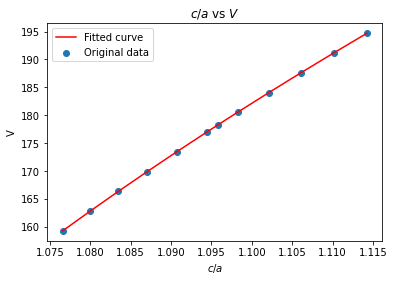

In [9]:
import matplotlib.pyplot as plt

def c_a(v):
    return c0_a0 + alpha*(1-(v / V0)) + beta*((1-(v/V0))**2)

C_A_eval = [c_a(v) for v in V]

fig, ax = plt.subplots()
ax.scatter(C_A,V, label = 'Original data')
ax.plot(sorted(C_A_eval), sorted(V), color='r', label = 'Fitted curve')
plt.xlabel('$c/a$')
plt.ylabel('V')
plt.title('$c/a$ vs $V$')
plt.legend()
plt.plot()